<a href="https://colab.research.google.com/github/abou-zithar/Exploratory-data-Analysis---Retail_spark_task_3/blob/master/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Exploratory data Analyisis - Retail



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/SampleSuperstore.csv'
data=pd.read_csv(filepath)

In [ ]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### the data has no nulls 

In [ ]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# find the unquie values in the data 

In [ ]:
data.nunique()
# there is only one country and it is USA so we will drop this col

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


# we have
1. 531 city
2. 49 satae
3. 4 region  



# drop this col


In [ ]:
data.drop(['Country'],inplace=True,axis=1)

# find if data has any duplication

In [ ]:
pres_duplicat=data.duplicated().sum()/data.shape[0]*100

print('data has duplication {} %:'.format(pres_duplicat))

data has duplication 0.17010206123674204 %:


# drop duplication

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Postal Code   9977 non-null   int64  
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1013.3+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


# find the corrlation between the numerical data we have

In [ ]:
# import seaborn 
import seaborn as sns

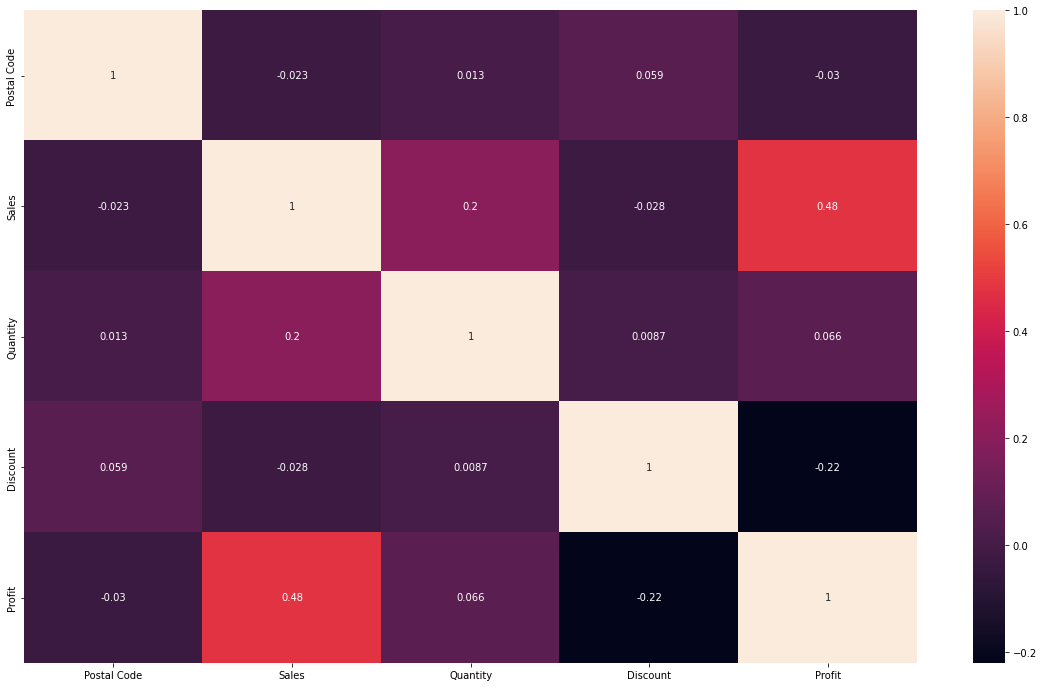

In [ ]:

corrliation=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corrliation,annot=True)

### the most corrlated feature with the profit is the sales

In [ ]:
# find out more about the relation between sales and profit 
import plotly.express as px
fig=px.scatter(y=data['Sales'],x=data['Profit'],data_frame=data)

fig

## At lower sales, a business either gets profit or loss. But, when the sales are high, a business mostly gets profit


```
 get the Ratios between sales and profit 
```




In [ ]:

new_info = pd.DataFrame(data.groupby('State').sum()[['Sales','Profit']])

new_info['Profit_to_sales'] = new_info['Profit']/new_info['Sales']

new_info.sort_values(by='Profit_to_sales',inplace = True, ascending = False)


In [ ]:
# display the out put of the ratio
print("Highest 10 Ratios :\n")
print(new_info[:10])

print('-'*80)

print("Lowest 10 Ratios:\n")
print(new_info[-10:])

Highest 10 Ratios :

                          Sales      Profit  Profit_to_sales
State                                                       
District of Columbia   2865.020   1059.5893         0.369837
Delaware              27451.069   9977.3748         0.363460
Minnesota             29863.150  10823.1874         0.362426
Maine                  1270.530    454.4862         0.357714
Arkansas              11678.130   4008.6871         0.343264
Indiana               53555.360  18382.9363         0.343251
Georgia               49095.840  16250.0433         0.330986
Montana                5589.352   1833.3285         0.328004
Rhode Island          22627.956   7285.6293         0.321975
Michigan              75879.644  24428.0903         0.321932
--------------------------------------------------------------------------------
Lowest 10 Ratios:

                      Sales      Profit  Profit_to_sales
State                                                   
Florida          89473.7080  -339

## District of Columbia is the best place to sale low amount and get higher profit

## Ohio has the worst profit to sales ratio.

In [ ]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
plotdata=pd.DataFrame(data.groupby('Region').sum()[['Sales','Profit']])

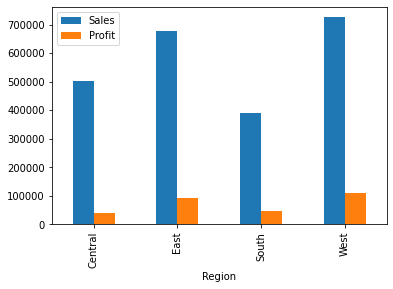

In [ ]:
plotdata.plot(kind='bar')

#### West & East regions have shown higher sales and profits as compared to the South and central regions.

In [ ]:
#Top 10 states with maximum number of items sold
data.groupby('State').count()['Quantity'].sort_values(ascending= False)[:10]


State
California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: Quantity, dtype: int64

In [ ]:
#least 10 states with minimun number of items sold
data.groupby('State').count()['Quantity'].sort_values()[:10]

State
Wyoming                  1
West Virginia            4
North Dakota             7
Maine                    8
District of Columbia    10
Vermont                 11
South Dakota            12
Montana                 15
Idaho                   21
Kansas                  24
Name: Quantity, dtype: int64

In [ ]:
state_wise_sales = pd.DataFrame(data.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


In [ ]:
# Top 10 stores with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# Stores with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])

States with maximum amount of sales:
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


#  North Dakota is the minimun amount of sales

In [ ]:
# Top 10 states with maximum amount of profit
print('States with maximum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values(ascending= False)[:10])

print('\n','='*50, '\n')

# States with minimum amount of profit
print('States with minimum amount of profit:\n',data.groupby('State').sum()['Profit'].sort_values()[:10])

States with maximum amount of profit:
 State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


States with minimum amount of profit:
 State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1194.0993
Name: Profit, dtype: float64


## Texas  is the minimun amout of profit 

In [ ]:
#new dataframe having states and regions
state_region = data[['State','Region']]

#drop duplicated values
state_region = state_region.drop_duplicates()
state_region.head()

#adding region column to state_wise_sales dataframe



,State,Region
0,Kentucky,South
2,California,West
3,Florida,South
12,North Carolina,South
13,Washington,West


In [ ]:
state_wise_sales.head()
# the sale in each state

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620


In [ ]:
#adding region column to state_wise_sales dataframe
state_wise_sales = pd.merge(state_wise_sales, state_region)
state_wise_sales.head()

,State,Sales,Region
0,California,457576.2715,West
1,New York,310827.1510,East
2,Texas,170124.5418,Central
3,Washington,138560.8100,West
4,Pennsylvania,116496.3620,East


## visualization the final result 

In [ ]:
#plotting Sales Statewise
plt.figure(figsize=(20,10))
g= px.bar(state_wise_sales,x='State', y='Sales', color='Region',title="sales of each state ")
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.show()

<Figure size 1440x720 with 0 Axes>


*   The company has highest sales in the state of California which is around
450k.
*   New York is the state that constitutes the second highest sales for the company of around 300k.
*   The states of Texas and Washington end up 3rd and 4th on the chart with around 150k and 140k in sales correspondingly.
*   Maximum of the sales are done in the west and the east coast regions.

